<h2>Importing Libraries and Modules</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

from geopy.distance import great_circle
import datetime

In [2]:
pd.set_option("display.max_columns", 200)
%matplotlib inline

<h2>Loading the Datasets</h2>

In [3]:
## Loading the Datasets
train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 14 columns):
tripid                       17176 non-null int64
additional_fare              16974 non-null float64
duration                     16974 non-null float64
meter_waiting                16974 non-null float64
meter_waiting_fare           16974 non-null float64
meter_waiting_till_pickup    16974 non-null float64
pickup_time                  17176 non-null object
drop_time                    17176 non-null object
pick_lat                     17176 non-null float64
pick_lon                     17176 non-null float64
drop_lat                     17176 non-null float64
drop_lon                     17176 non-null float64
fare                         17039 non-null float64
label                        17176 non-null object
dtypes: float64(10), int64(1), object(3)
memory usage: 1.8+ MB


<h2>Cleaning the Data</h2>

In [5]:
## converting label values into 0,1 instead of correct, incorrect

train.label = train.label.map(dict(correct=1, incorrect=0))

In [6]:
## check for missing values in the dataset

# train.isna().head()
train.isna().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [7]:
## fill missing values by mean of the column

# train.fillna(train.mean(), inplace=True)

# imputer = IterativeImputer(max_iter=10, random_state=42)
# imputer.fit(train.iloc[:,[1,2,3,4,5,12]])
# train.iloc[:,[1,2,3,4,5,12]] = imputer.transform(train.iloc[:,[1,2,3,4,5,12]])

imputer = KNNImputer(n_neighbors=5, weights='uniform')
train.iloc[:,[1,2,3,4,5,12]] = imputer.fit_transform(train.iloc[:,[1,2,3,4,5,12]])


In [8]:
train.isna().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
dtype: int64

<h2>Data Visualization</h2>

<h3>Labels</h3>
<h4>Checking Class Balancing</h4>

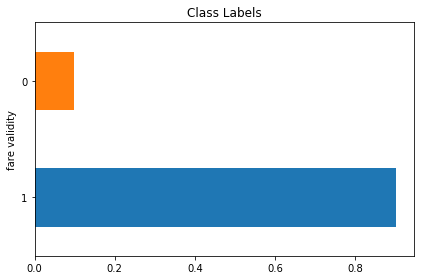

In [9]:
fig, ax = plt.subplots(1, 1, sharex=True)
n_obs = train.shape[0]

(train['label'].value_counts()
     .div(n_obs)
     .plot.barh(title='Class Labels'))
ax.set_ylabel('fare validity')
fig.tight_layout()


In [10]:
train['label'].value_counts()

1    15495
0     1681
Name: label, dtype: int64

<h3>Distribution of Each Variable</h3>

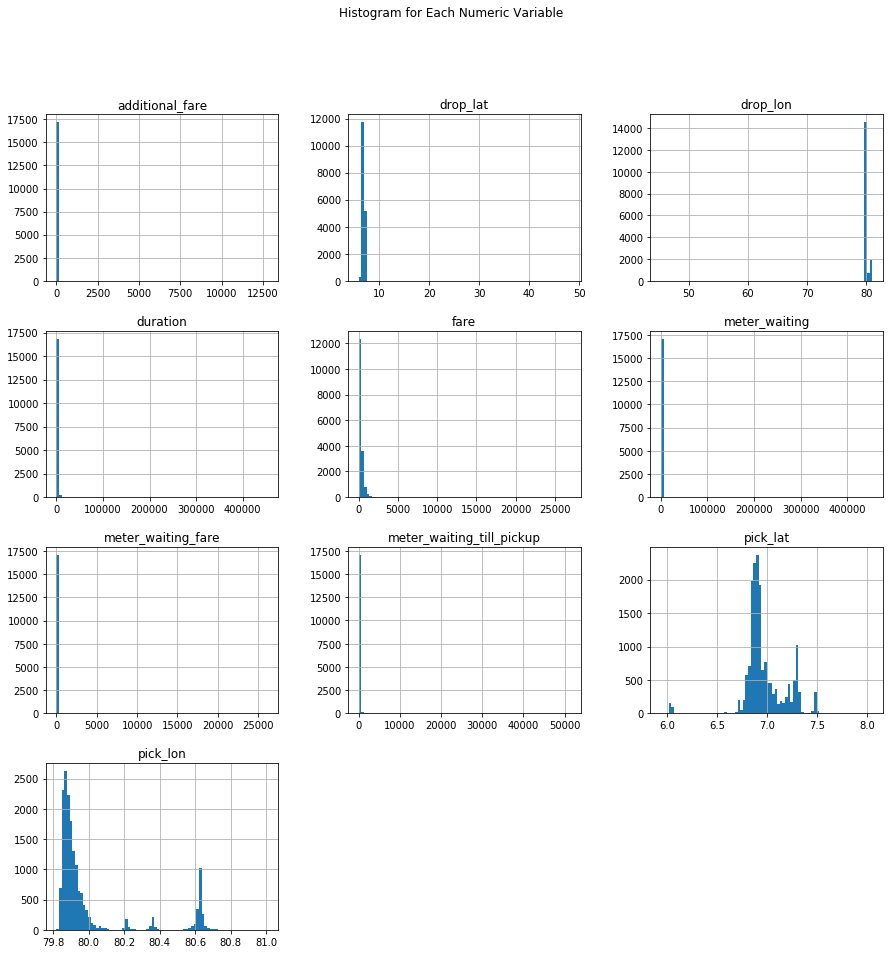

In [11]:
train.drop(['tripid', 'pickup_time', 'drop_time', 'label'], axis=1).hist(bins=80, figsize=(15,15))
pl.suptitle('Histogram for Each Numeric Variable')
plt.savefig('fare_hist')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


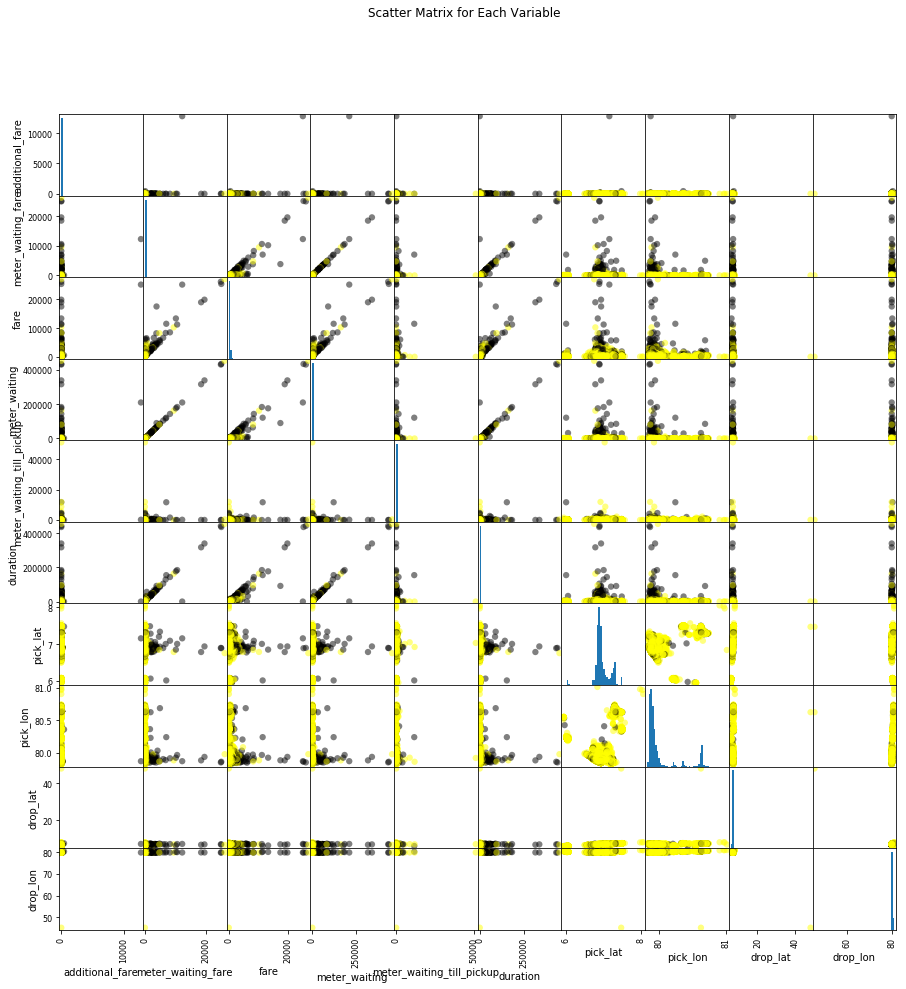

In [12]:
feature_names = ['additional_fare', 'meter_waiting_fare', 'fare', 'meter_waiting', 'meter_waiting_till_pickup', 'duration', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon']
X = train[feature_names]
y = train['label']

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c=y, marker='o', s=40, hist_kwds={'bins': 50}, figsize=(15,15), cmap=cmap)
plt.suptitle('Scatter Matrix for Each Variable')
plt.savefig('fare_scatter_matrix')


<h3>Correlation of Features with the Target Variable</h3>
<h4>Duration</h4>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


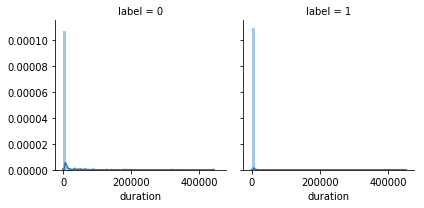

In [13]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'duration')

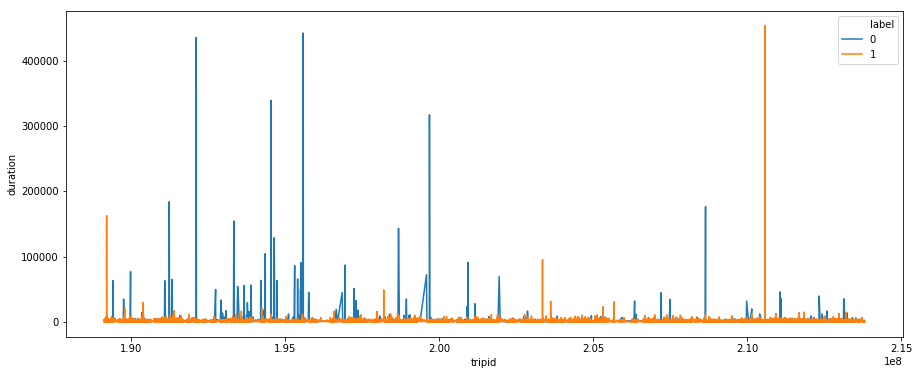

In [14]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='duration', hue='label', data=train, ax=ax)


<h4>meter_waiting_till_pickup</h4>

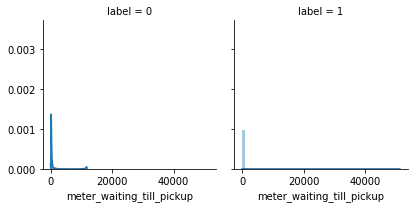

In [15]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'meter_waiting_till_pickup')

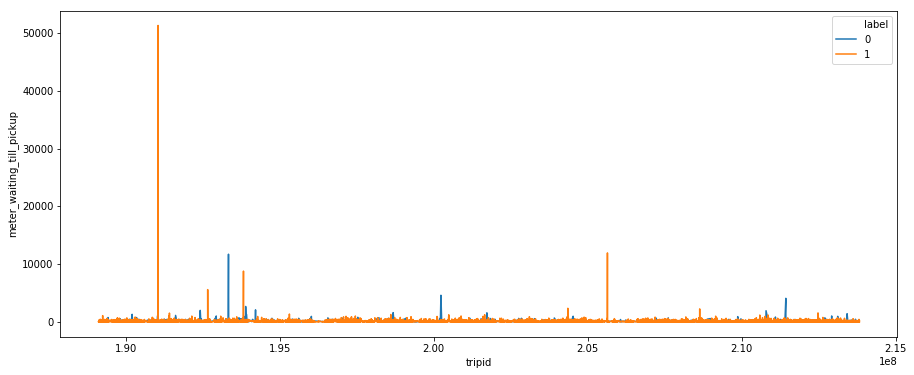

In [16]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='meter_waiting_till_pickup', hue='label', data=train, ax=ax)


<h4>meter_waiting</h4>

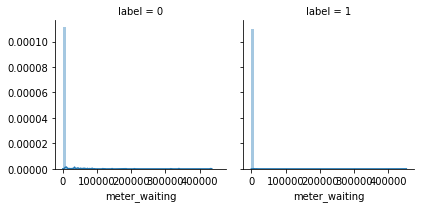

In [17]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'meter_waiting')

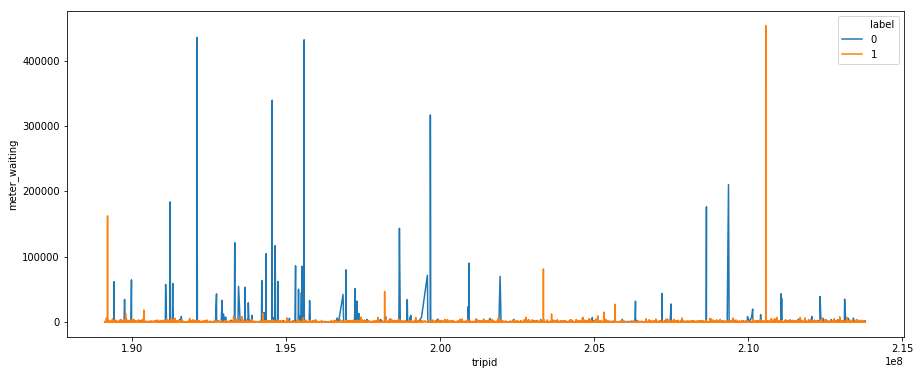

In [18]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='meter_waiting', hue='label', data=train, ax=ax)


<h4>fare</h4>

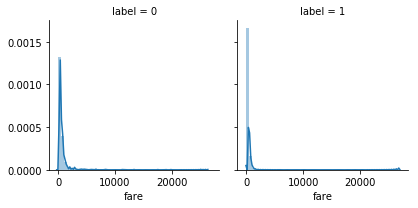

In [19]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'fare')

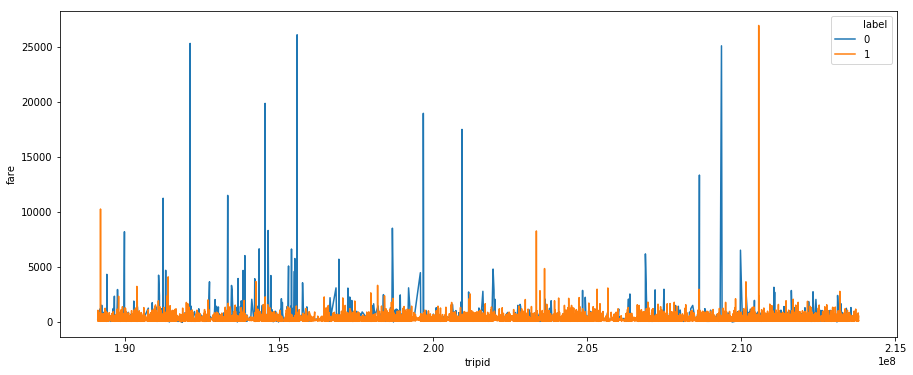

In [20]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='fare', hue='label', data=train, ax=ax)


<h4>Additional Fare</h4>

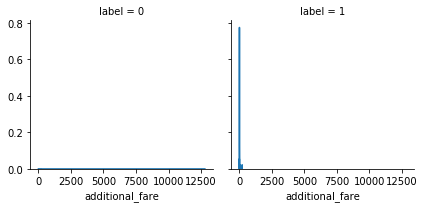

In [21]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'additional_fare')

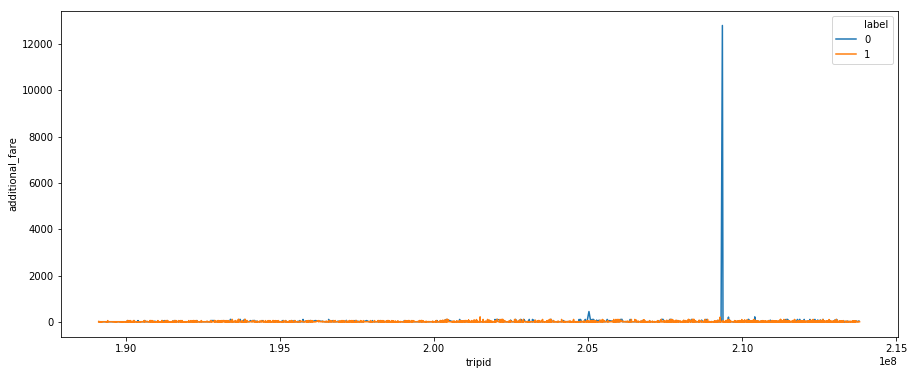

In [22]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='additional_fare', hue='label', data=train, ax=ax)


<h4>meter_waiting_fare</h4>

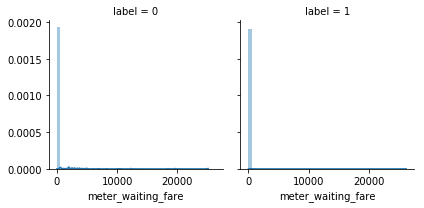

In [23]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'meter_waiting_fare')

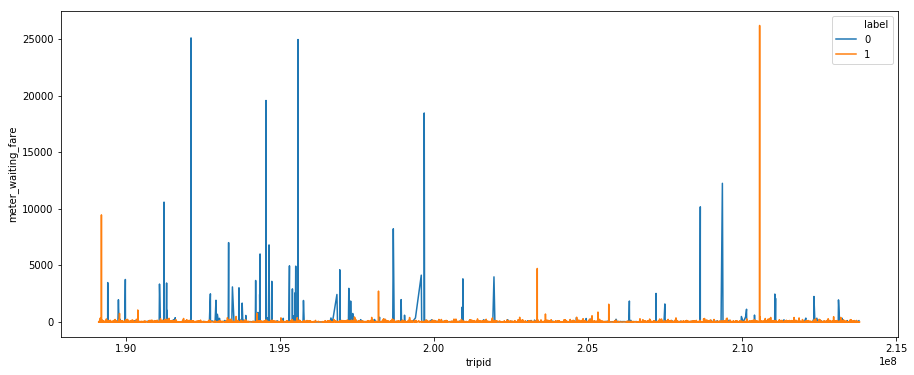

In [24]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='meter_waiting_fare', hue='label', data=train, ax=ax)


<h4>pick_lat, pick_lon</h4>

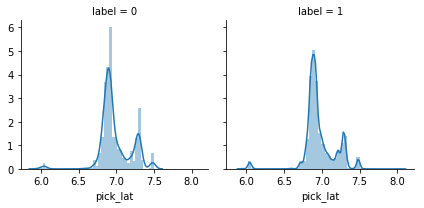

In [25]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'pick_lat')

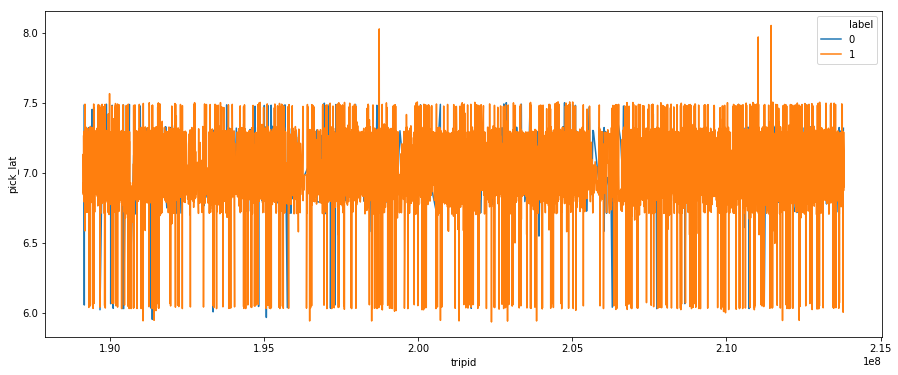

In [26]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='pick_lat', hue='label', data=train, ax=ax)


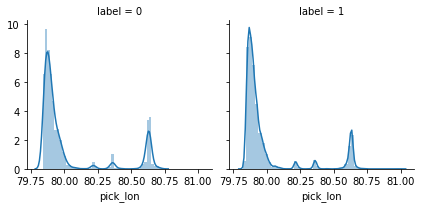

In [27]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'pick_lon')

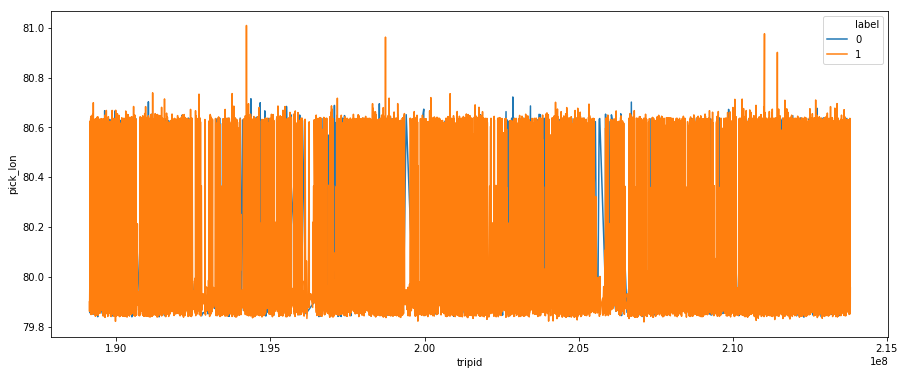

In [28]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='pick_lon', hue='label', data=train, ax=ax)


<h4>drop_lat, drop_lon</h4>

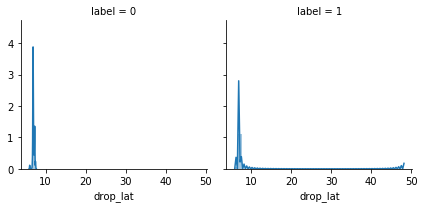

In [29]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'drop_lat')

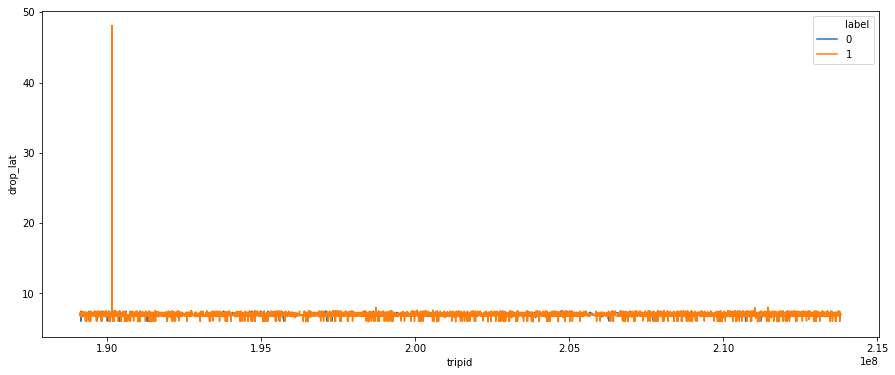

In [30]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='drop_lat', hue='label', data=train, ax=ax)


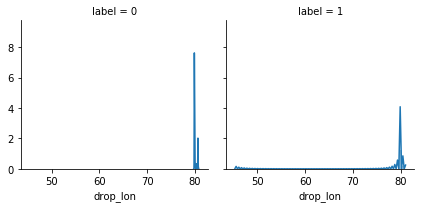

In [31]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'drop_lon')

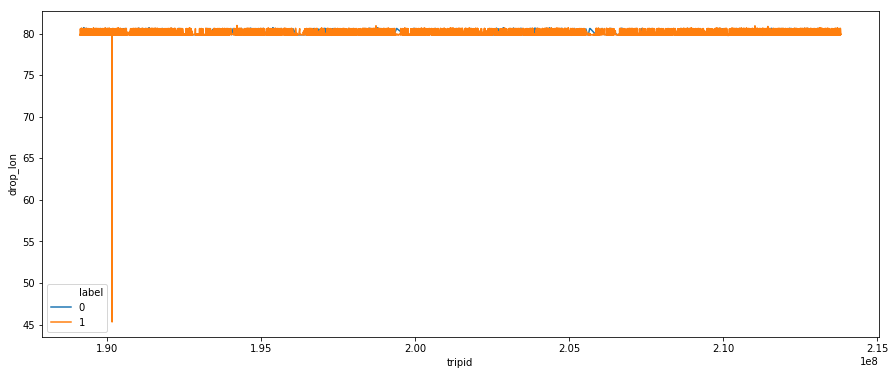

In [32]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='drop_lon', hue='label', data=train, ax=ax)


<h2>New Features</h2>

<h3>Create New Features</h3>

In [33]:
## new feature columns
trip_fare = []
trip_duration = []
trip_distance = []

distance_to_duration = []
fare_to_duration = []                   
fare_to_distance = []
waiting_fare_to_waiting_duration = []

duration_from_time = []
duration_error = []


In [34]:
## iterate through each row in the dataset
for row in train.itertuples():
    fare = float(row.fare)
    additional_fare = float(row.additional_fare)
    meter_waiting_fare = float(row.meter_waiting_fare)
    
    meter_waiting = row.meter_waiting
    meter_waiting_till_pickup = row.meter_waiting_till_pickup
    duration = row.duration
    
    pick_lat = row.pick_lat
    pick_lon = row.pick_lon
    drop_lat = row.drop_lat
    drop_lon = row.drop_lon
    
    pickup_time = row.pickup_time.split('/')
    drop_time = row.drop_time.split('/')
    
    # total fare for the trip
    cur_trip_fare = fare - (additional_fare + meter_waiting_fare)
    trip_fare.append(cur_trip_fare)
    
    # trip duration
    cur_trip_duration = duration - meter_waiting
    trip_duration.append(cur_trip_duration)
    
    # trip distance
    cur_trip_distance = float(great_circle((drop_lat, drop_lon),(pick_lat, pick_lon)).kilometers)
    trip_distance.append(cur_trip_distance)
    
    # trip distance to duration
    try:
        cur_dist_to_dur = round(cur_trip_distance / cur_trip_duration, 1)
    except ZeroDivisionError:
        cur_dist_to_dur  = 0
    distance_to_duration.append(cur_dist_to_dur)
    
    # trip fare to trip duration
    try:
        cur_fare_to_duration = round(cur_trip_fare / cur_trip_duration, 1)
    except ZeroDivisionError:
        cur_fare_to_duration  = 0
    fare_to_duration.append(cur_fare_to_duration)
    
    # trip fare to trip distance
    try:
        cur_fare_to_distance = round(cur_trip_fare / cur_trip_distance, 1)
    except ZeroDivisionError:
        cur_fare_to_distance  = 0
    fare_to_distance.append(cur_fare_to_distance)
    
    # trip waiting fare to waiting duration
    try:
        cur_waiting_fare_to_waiting_dur = meter_waiting_fare / meter_waiting
    except ZeroDivisionError:
        cur_waiting_fare_to_waiting_dur  = 0
    waiting_fare_to_waiting_duration.append(cur_waiting_fare_to_waiting_dur)
    
    # time duration
    # pickup time
    month, day, y_hm = int(pickup_time[0]), int(pickup_time[1]), pickup_time[2].split(' ')
    year, h_m = int(y_hm[0]), y_hm[1].split(':')
    hour, minute = int(h_m[0]), int(h_m[1])
    pickup_time = datetime.datetime(year, month, day, hour, minute)
    
    # drop time
    month, day, y_hm = int(drop_time[0]), int(drop_time[1]), drop_time[2].split(' ')
    year, h_m = int(y_hm[0]), y_hm[1].split(':')
    hour, minute = int(h_m[0]), int(h_m[1])
    drop_time = datetime.datetime(year, month, day, hour, minute)
    
    # duration
    cur_duration_from_time = (drop_time - pickup_time).seconds
    duration_from_time.append(cur_duration_from_time)
    duration_error.append(cur_duration_from_time - duration)


In [35]:
## append new columns to dataset
train['trip_fare'] = trip_fare
train['trip_duration'] = trip_duration
train['trip_distance'] = trip_distance
train['distance_to_duration'] = distance_to_duration
train['fare_to_duration'] = fare_to_duration
train['fare_to_distance'] = fare_to_distance
train['waiting_fare_to_waiting_duration'] = waiting_fare_to_waiting_duration
train['duration_from_time'] = duration_from_time
train['duration_error'] = duration_error


<h3>Correlation of New Features with the Target Variable</h3>
<h4>trip_fare</h4>

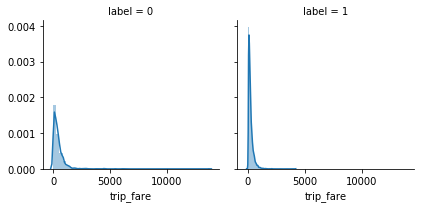

In [36]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'trip_fare')

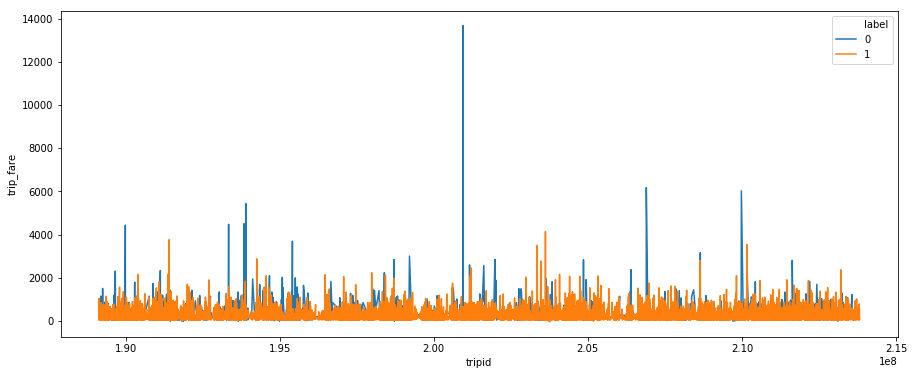

In [37]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='trip_fare', hue='label', data=train, ax=ax)


<h4>trip_duration</h4>

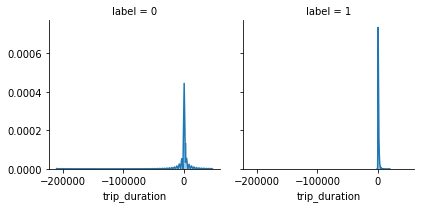

In [38]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'trip_duration')

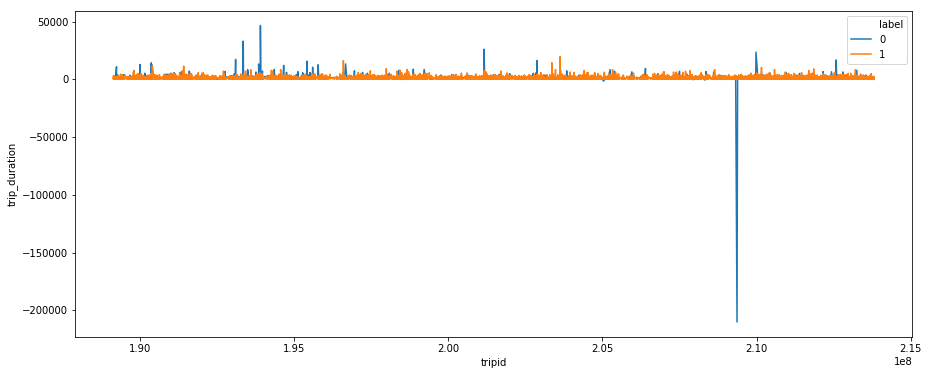

In [39]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='trip_duration', hue='label', data=train, ax=ax)


<h4>trip_distance</h4>

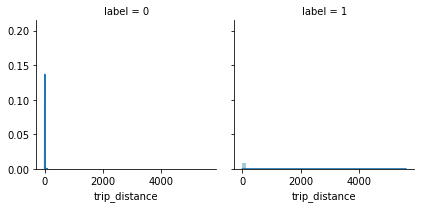

In [40]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'trip_distance')

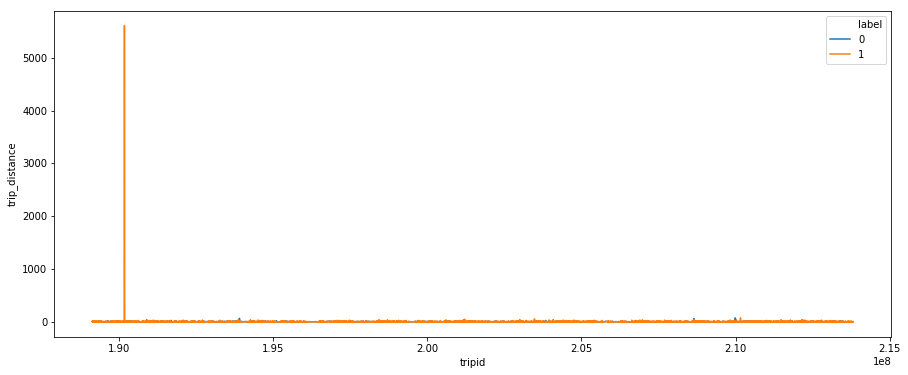

In [41]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='trip_distance', hue='label', data=train, ax=ax)


<h4>distance_to_duration</h4>

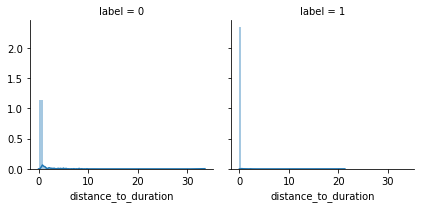

In [42]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'distance_to_duration')

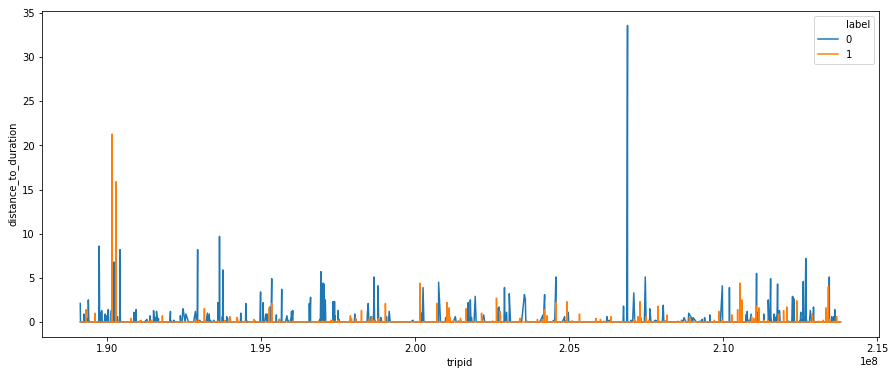

In [43]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='distance_to_duration', hue='label', data=train, ax=ax)


<h4>fare_to_duration</h4>

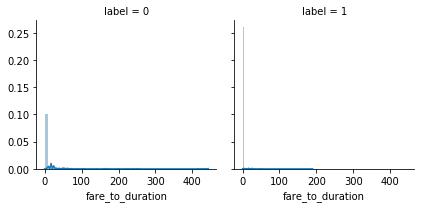

In [44]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'fare_to_duration')

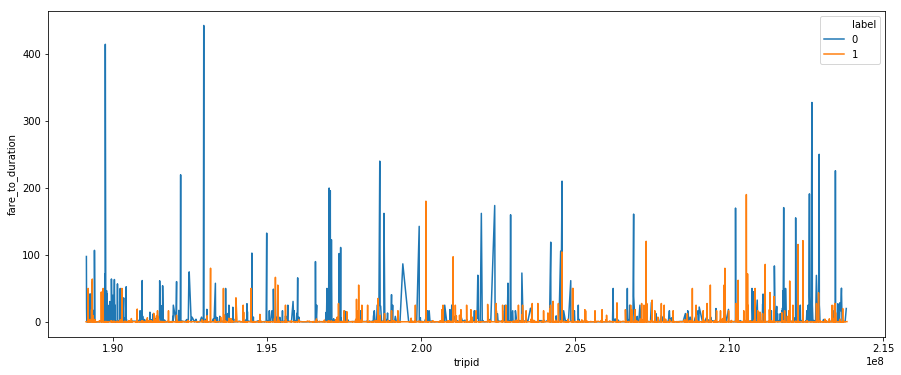

In [45]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='fare_to_duration', hue='label', data=train, ax=ax)


<h4>fare_to_distance</h4>

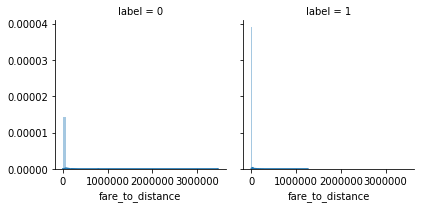

In [46]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'fare_to_distance')

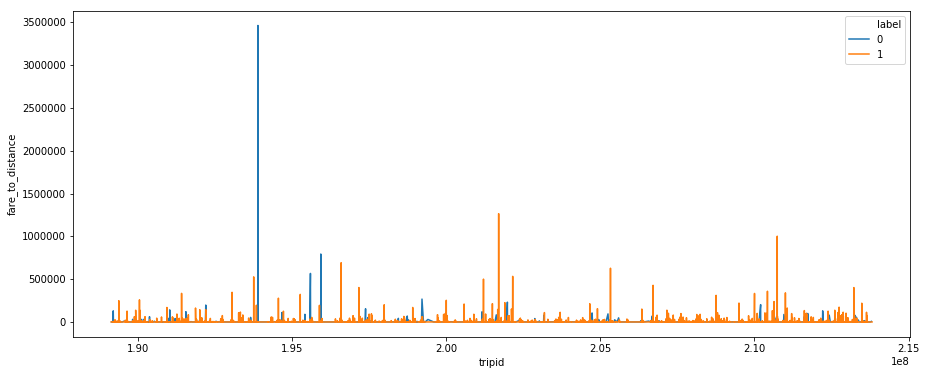

In [47]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='fare_to_distance', hue='label', data=train, ax=ax)


<h4>waiting_fare_to_waiting_duration</h4>

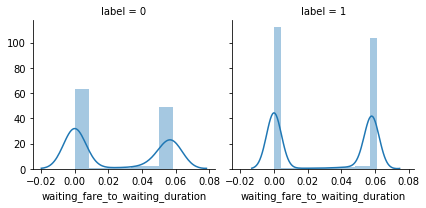

In [48]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'waiting_fare_to_waiting_duration')

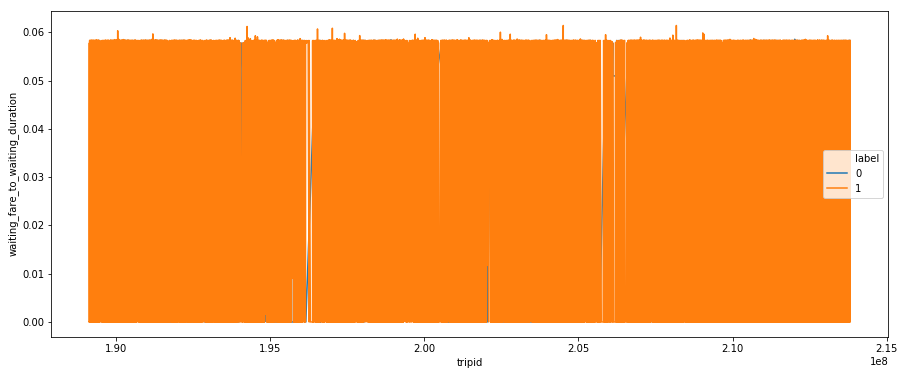

In [49]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='waiting_fare_to_waiting_duration', hue='label', data=train, ax=ax)


<h4>duration_from_time</h4>

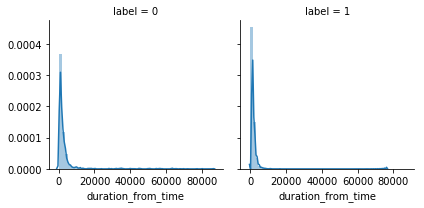

In [50]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'duration_from_time')

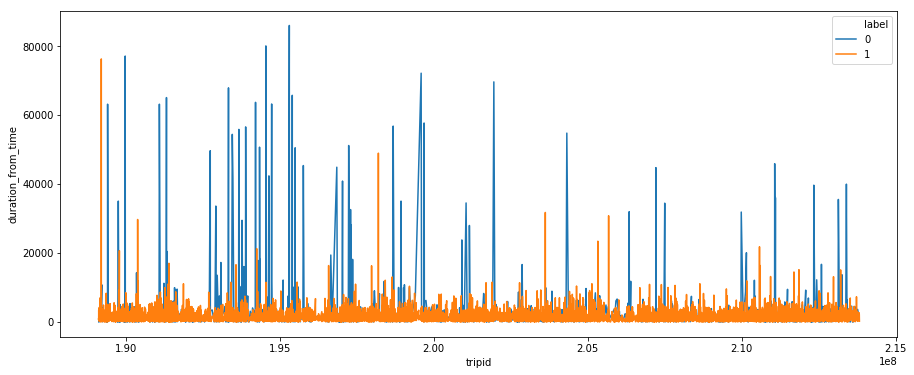

In [51]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='duration_from_time', hue='label', data=train, ax=ax)


<h4>duration_error</h4>

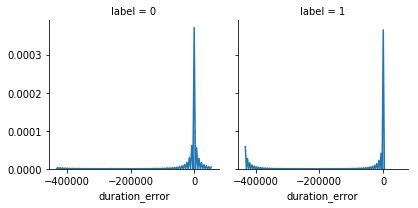

In [52]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'duration_error')

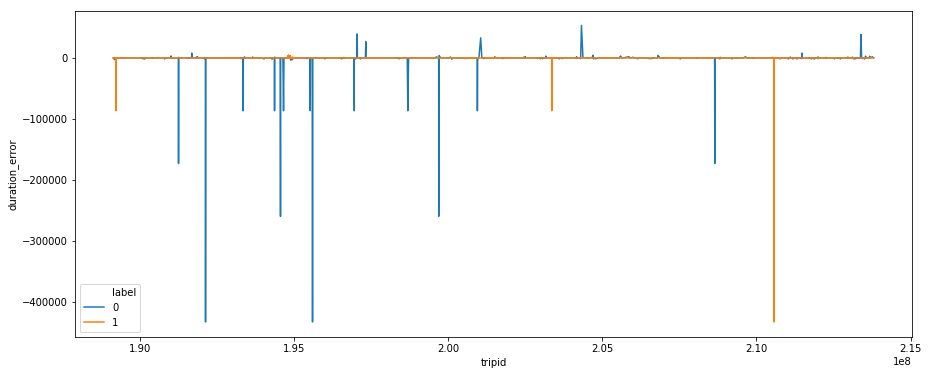

In [53]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='duration_error', hue='label', data=train, ax=ax)


<h2>More New Features</h2>

In [54]:
## column average values
avg_fare = train['fare'].mean()
avg_trip_fare = train['trip_fare'].mean()
avg_waiting_fare = train['meter_waiting_fare'].mean()
avg_fare_to_distance = train['fare_to_distance'].mean()
avg_waiting_fare_to_duration = train['waiting_fare_to_waiting_duration'].mean()


In [55]:
## new columns
is_invalid_total_fare = []

div_from_avg_total_fare = []
div_from_avg_trip_fare = []
div_from_avg_waiting_fare = []

div_from_avg_fare_to_distance = []
div_from_avg_waiting_fare_to_waiting_duration = []

In [56]:
## iterate through each row in the dataset
for row in train.itertuples():
    fare = float(row.fare)
    trip_fare = float(row.trip_fare)
    meter_waiting_fare = float(row.meter_waiting_fare)
    additional_fare = float(row.additional_fare)
    
    fare_to_distance = float(row.fare_to_distance)
    waiting_fare_to_waiting_duration = float(row.waiting_fare_to_waiting_duration)
    
    # total fare less than or equal to zero
    if(fare-meter_waiting_fare-additional_fare <= 0):
        is_invalid_total_fare.append(1)
    else:
        is_invalid_total_fare.append(0)
        
    # diviation from average
    div_from_avg_total_fare.append(fare - avg_fare)
    div_from_avg_trip_fare.append(trip_fare - avg_trip_fare)
    div_from_avg_waiting_fare.append(meter_waiting_fare - avg_waiting_fare)
    div_from_avg_fare_to_distance.append(fare_to_distance - avg_fare_to_distance)
    div_from_avg_waiting_fare_to_waiting_duration.append(waiting_fare_to_waiting_duration - avg_waiting_fare_to_duration)


In [57]:
## append new columns to dataset
train['is_invalid_total_fare'] = is_invalid_total_fare
train['div_from_avg_total_fare'] = div_from_avg_total_fare
train['div_from_avg_trip_fare'] = div_from_avg_trip_fare
train['div_from_avg_waiting_fare'] = div_from_avg_waiting_fare
train['div_from_avg_fare_to_distance'] = div_from_avg_fare_to_distance
train['div_from_avg_waiting_fare_to_waiting_duration'] = div_from_avg_waiting_fare_to_waiting_duration


<h3>Correlation of New Features with the Target Variable</h3>
<h4>is_invalid_total_fare</h4>

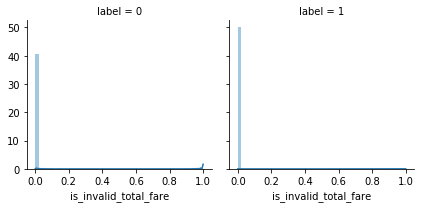

In [58]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'is_invalid_total_fare')

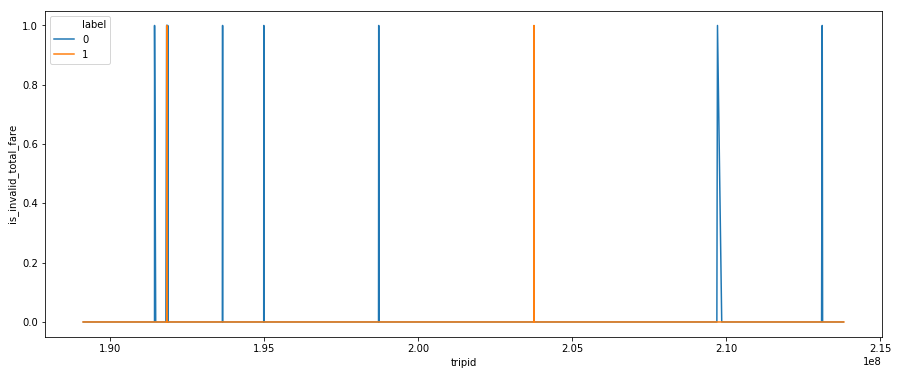

In [59]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='is_invalid_total_fare', hue='label', data=train, ax=ax)


In [60]:
train['is_invalid_total_fare'].value_counts()


0    17161
1       15
Name: is_invalid_total_fare, dtype: int64

<h4>div_from_avg_total_fare</h4>

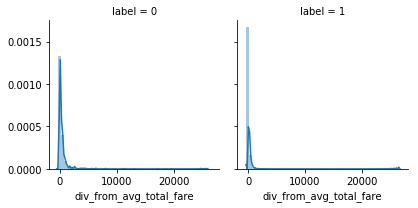

In [61]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'div_from_avg_total_fare')

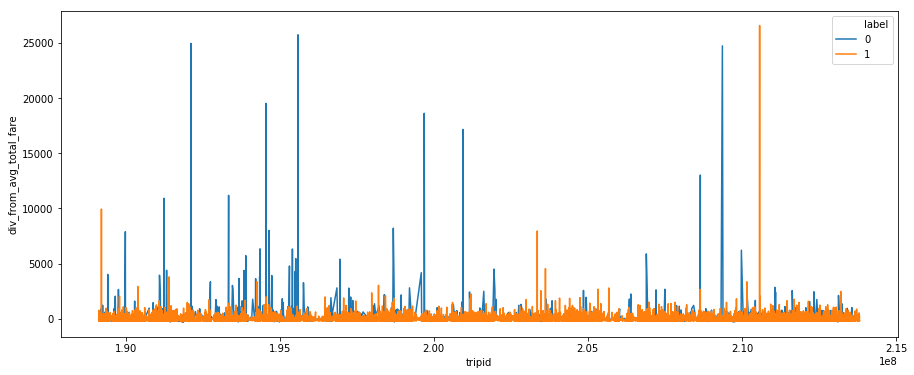

In [62]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='div_from_avg_total_fare', hue='label', data=train, ax=ax)


<h4>div_from_avg_trip_fare</h4>

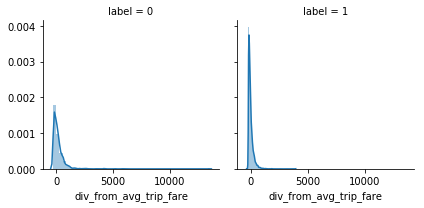

In [63]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'div_from_avg_trip_fare')

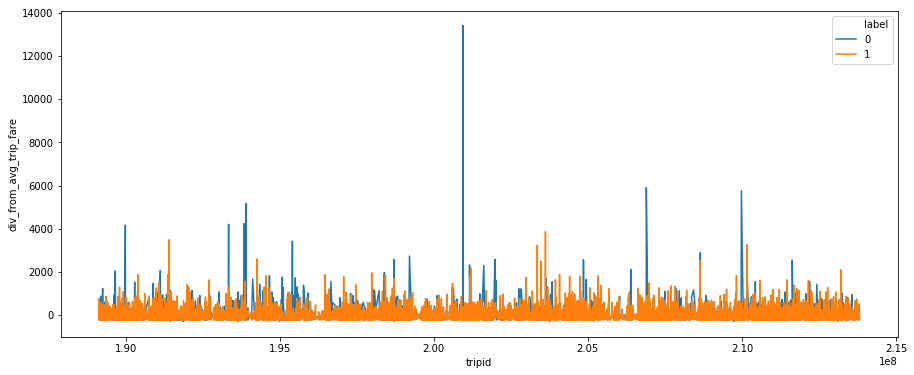

In [64]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='div_from_avg_trip_fare', hue='label', data=train, ax=ax)


<h4>div_from_avg_waiting_fare</h4>

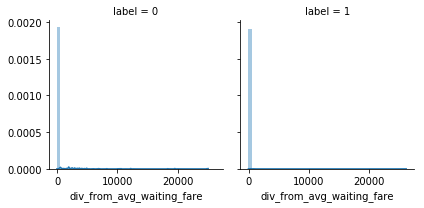

In [65]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'div_from_avg_waiting_fare')

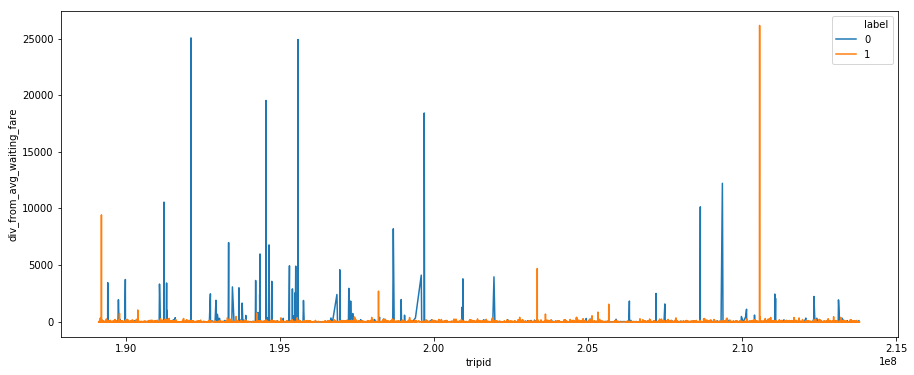

In [66]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='div_from_avg_waiting_fare', hue='label', data=train, ax=ax)


<h4>div_from_avg_fare_to_distance</h4>

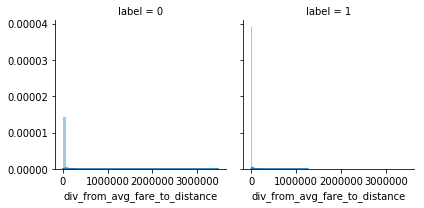

In [67]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'div_from_avg_fare_to_distance')

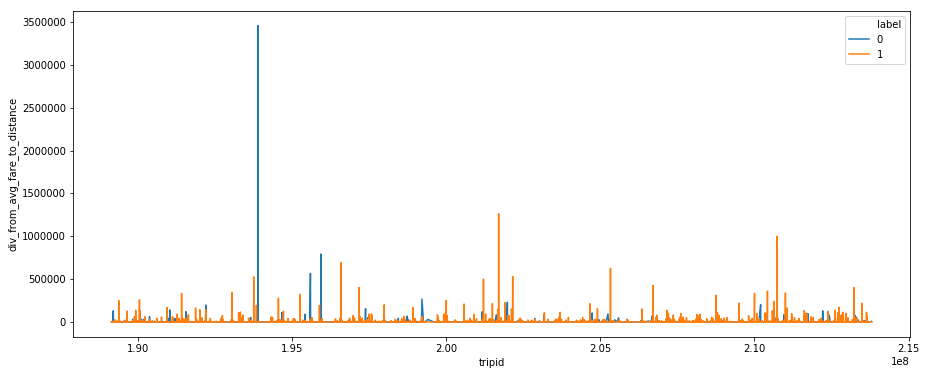

In [68]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='div_from_avg_fare_to_distance', hue='label', data=train, ax=ax)


<h4>div_from_avg_waiting_fare_to_waiting_duration</h4>

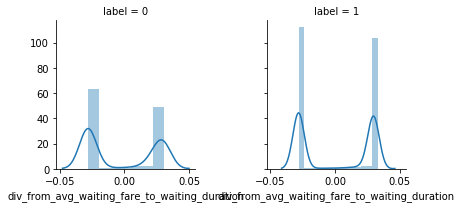

In [69]:
g = sns.FacetGrid(train, col='label')
g = g.map(sns.distplot, 'div_from_avg_waiting_fare_to_waiting_duration')

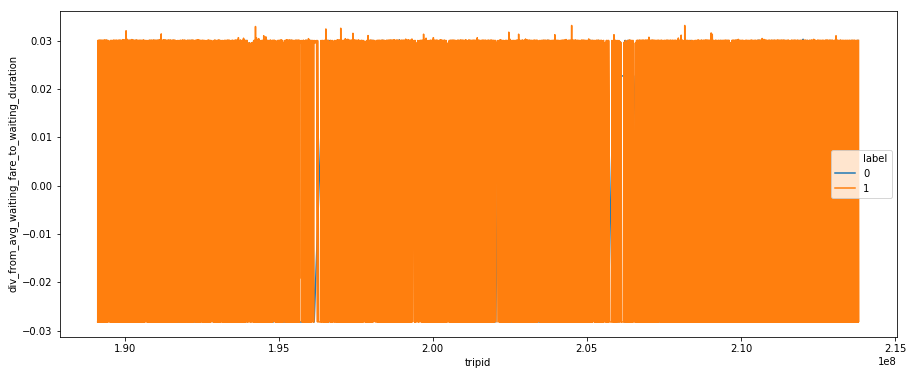

In [70]:
figsize = (15, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='tripid', y='div_from_avg_waiting_fare_to_waiting_duration', hue='label', data=train, ax=ax)
